In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('speed_data_2.csv')
column_topics = ['Status', 'Time', 'Speed']
df.columns = column_topics
value_to_filter = 0.0
df_filtered = df[df['Speed'] != value_to_filter]
df_filtered

,Status,Time,Speed
6,start,1.705467e+09,8.28
7,end,1.705467e+09,8.28
8,start,1.705467e+09,9.10
9,end,1.705467e+09,9.10
10,start,1.705467e+09,10.38
...,...,...,...
575,end,1.705467e+09,16.26
576,start,1.705467e+09,15.71
577,end,1.705467e+09,16.02
578,start,1.705467e+09,15.40


In [3]:
df_start = df_filtered[df_filtered['Status'] == 'start']
print(df_start.shape)
df_start.head()

(287, 3)


,Status,Time,Speed
6,start,1.705467e+09,8.28
8,start,1.705467e+09,9.10
10,start,1.705467e+09,10.38
12,start,1.705467e+09,11.07
14,start,1.705467e+09,12.21


In [4]:
df_end = df_filtered[df_filtered['Status'] == 'end']
print(df_end.shape)
df_end.head()

(287, 3)


,Status,Time,Speed
7,end,1.705467e+09,8.28
9,end,1.705467e+09,9.10
11,end,1.705467e+09,9.75
13,end,1.705467e+09,10.38
15,end,1.705467e+09,11.07


In [5]:
start_speed_list = df_start['Speed'].tolist()
end_speed_list = df_end['Speed'].tolist()
start_time_list = df_start['Time'].tolist()
end_time_list = df_end['Time'].tolist()

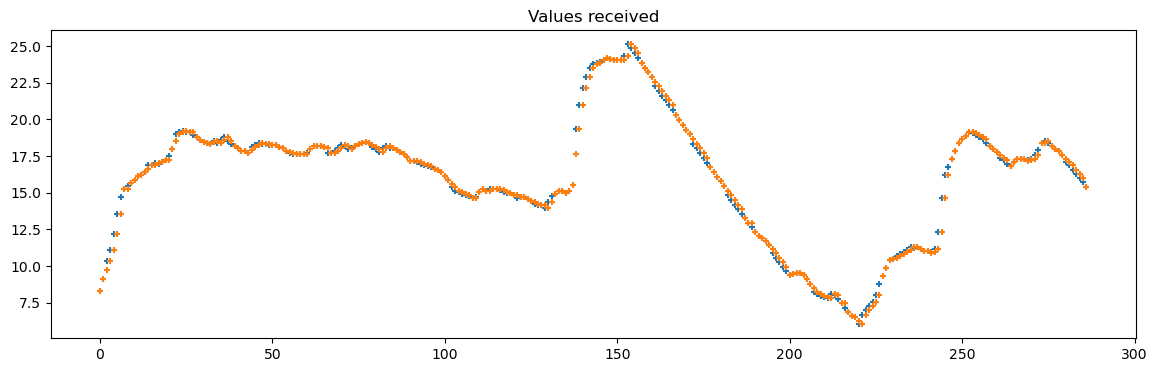

In [6]:
num_values = df_start.shape[0]
value_number = [i for i in range(num_values)]
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
ax.scatter(value_number, start_speed_list, marker='+', s=20)
ax.set_title("Values transmitted")
ax.scatter(value_number, end_speed_list, marker='+', s=20)
ax.set_title("Values received")
plt.show()

In [12]:
i = 0
j = 0
time_delay_list = []
for k in range(len(start_speed_list)):
    if (end_speed_list[j] == start_speed_list[i]):
        time_diff = end_time_list[j] - start_time_list[i]
        delay = time_diff / 2
        time_delay_list.append(delay)
    elif ((i+1) >= num_values or (j+1) >= num_values):
        break
    elif (end_speed_list[j + 1] == start_speed_list[i]):
        time_diff = end_time_list[j + 1] - start_time_list[i]
        delay = time_diff / 2
        time_delay_list.append(delay)
        j += 1
    elif (end_speed_list[j] == start_speed_list[i + 1]):
        time_diff = end_time_list[j] - start_time_list[i + 1]
        delay = time_diff / 2
        time_delay_list.append(delay)
        i += 1
    i += 1
    j += 1
    if (i >= num_values or j >= num_values):
        break

In [13]:
print(len(time_delay_list))

253


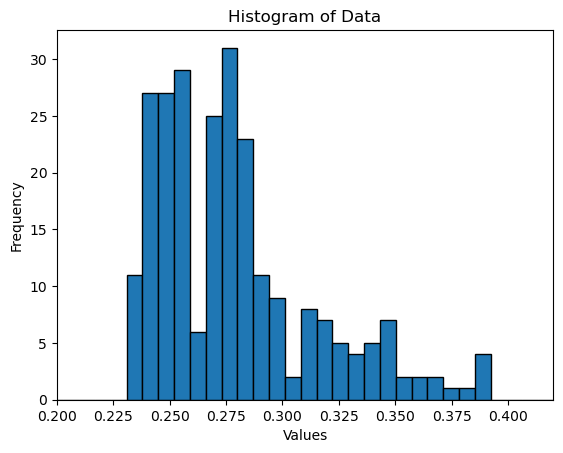

In [18]:
plt.hist(time_delay_list, bins=150, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.xlim(0.20, 0.42)
plt.show()

In [19]:
average = sum(time_delay_list) / len(time_delay_list)
print(average)

0.2801784734009754
